In [36]:
import cv2

from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim
import random
from utils.dataset import ImageSet, transform
from utils.metrics import plot_metrics
from utils.utils import fix_colors

# OpenCV Scalling

In [25]:
def classic_upscale(img):
    return cv2.resize(img, [256, 256], interpolation=2) # 2 = bicubic interpolation

# Neural Network Scalling

### Dataset

In [26]:
train_dataset = ImageSet("data/scalling/train", "data/intermediate/train", transform)
valid_dataset = ImageSet("data/scalling/valid", "data/intermediate/valid", transform)

train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)

### Model

In [27]:
class UpscaleCNN(nn.Module):
    def __init__(self):
        super(UpscaleCNN, self).__init__()

        # Encoder: 32x32 -> feature extraction
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),  # 32x32 -> 32x32
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),  # 32x32 -> 16x16
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),  # 16x16 -> 8x8
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1),  # 8x8 -> 4x4
            nn.ReLU(),
        )

        # Decoder: 4x4 -> 256x256 (upscaling)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, padding=1, output_padding=1),  # 4x4 -> 8x8
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),  # 8x8 -> 16x16
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),  # 16x16 -> 32x32
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),  # 32x32 -> 64x64
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),  # 64x64 -> 128x128
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=3, stride=2, padding=1, output_padding=1),  # 128x128 -> 256x256
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### Training

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
# model = UpscaleCNN()
# model.to(device)

# optimizer = optim.Adam(model.parameters(), lr=0.001)
# criterion = nn.MSELoss()

In [ ]:
# import tqdm

# num_epochs = 100

# losses = {"train":[],"val":[]}

# for epoch in range(num_epochs):
#     model.train()
#     for x, y in tqdm.tqdm(train_dataloader):
#         x, y = x.to(device), y.to(device)
#         optimizer.zero_grad() 
#         out = model(x)
#         loss = criterion(out, y)

#         loss.backward()
#         optimizer.step()
    
#     model.eval()
#     print(f"epoch #{epoch+1}, loss: {loss}")
#     losses["train"].append(loss)
#     with torch.no_grad():
#         total_loss = 0.0
#         for x, y in valid_dataset:
#             x, y = x.to(device), y.to(device)
#             out = model(x)

#             loss = criterion(out, y)

#             total_loss += loss.item()
#         print("Validation loss:",total_loss)
#     losses["val"].append(total_loss)

100%|██████████| 100/100 [00:03<00:00, 29.54it/s]


epoch #1, loss: 0.04767657071352005
Validation loss: 4.041282675229013


100%|██████████| 100/100 [00:03<00:00, 30.92it/s]


epoch #2, loss: 0.027434615418314934
Validation loss: 3.6282448079437017


100%|██████████| 100/100 [00:03<00:00, 31.07it/s]


epoch #3, loss: 0.031943630427122116
Validation loss: 3.35882069170475


100%|██████████| 100/100 [00:03<00:00, 31.01it/s]


epoch #4, loss: 0.030814995989203453
Validation loss: 3.2313487310893834


100%|██████████| 100/100 [00:03<00:00, 31.03it/s]


epoch #5, loss: 0.033443063497543335
Validation loss: 3.110587263479829


100%|██████████| 100/100 [00:03<00:00, 30.98it/s]


epoch #6, loss: 0.028781384229660034
Validation loss: 3.0751857394352555


100%|██████████| 100/100 [00:03<00:00, 30.92it/s]


epoch #7, loss: 0.02866918407380581
Validation loss: 3.137405660469085


100%|██████████| 100/100 [00:03<00:00, 30.93it/s]


epoch #8, loss: 0.03858219087123871
Validation loss: 3.011490700766444


100%|██████████| 100/100 [00:03<00:00, 30.80it/s]


epoch #9, loss: 0.0433809868991375
Validation loss: 3.017239320091903


100%|██████████| 100/100 [00:03<00:00, 31.00it/s]


epoch #10, loss: 0.022735267877578735
Validation loss: 2.963179962243885


100%|██████████| 100/100 [00:03<00:00, 30.98it/s]


epoch #11, loss: 0.031271032989025116
Validation loss: 2.965075380168855


100%|██████████| 100/100 [00:03<00:00, 30.89it/s]


epoch #12, loss: 0.02792869322001934
Validation loss: 2.930893496144563


100%|██████████| 100/100 [00:03<00:00, 30.93it/s]


epoch #13, loss: 0.02907887101173401
Validation loss: 2.912697278894484


100%|██████████| 100/100 [00:03<00:00, 30.97it/s]


epoch #14, loss: 0.01925135962665081
Validation loss: 2.882262074854225


100%|██████████| 100/100 [00:03<00:00, 30.77it/s]


epoch #15, loss: 0.045178428292274475
Validation loss: 2.868848101235926


100%|██████████| 100/100 [00:03<00:00, 30.96it/s]


epoch #16, loss: 0.03464427590370178
Validation loss: 2.850744416937232


100%|██████████| 100/100 [00:03<00:00, 31.08it/s]


epoch #17, loss: 0.028508402407169342
Validation loss: 2.8257239940576255


100%|██████████| 100/100 [00:03<00:00, 30.95it/s]


epoch #18, loss: 0.027131734415888786
Validation loss: 2.7976620802655816


100%|██████████| 100/100 [00:03<00:00, 30.80it/s]


epoch #19, loss: 0.027461176738142967
Validation loss: 2.479657170828432


100%|██████████| 100/100 [00:03<00:00, 31.09it/s]


epoch #20, loss: 0.024539917707443237
Validation loss: 2.633044332731515


100%|██████████| 100/100 [00:03<00:00, 30.81it/s]


epoch #21, loss: 0.01976625621318817
Validation loss: 2.381169688887894


100%|██████████| 100/100 [00:03<00:00, 30.77it/s]


epoch #22, loss: 0.019008342176675797
Validation loss: 2.39398037455976


100%|██████████| 100/100 [00:03<00:00, 30.78it/s]


epoch #23, loss: 0.02335239015519619
Validation loss: 2.3581005171872675


100%|██████████| 100/100 [00:03<00:00, 31.07it/s]


epoch #24, loss: 0.019915856420993805
Validation loss: 2.359199163969606


100%|██████████| 100/100 [00:03<00:00, 31.04it/s]


epoch #25, loss: 0.03222500905394554
Validation loss: 2.3609079383313656


100%|██████████| 100/100 [00:03<00:00, 31.07it/s]


epoch #26, loss: 0.02088673785328865
Validation loss: 2.337559515144676


100%|██████████| 100/100 [00:03<00:00, 31.09it/s]


epoch #27, loss: 0.020923223346471786
Validation loss: 2.3303570984862745


100%|██████████| 100/100 [00:03<00:00, 30.97it/s]


epoch #28, loss: 0.012620694935321808
Validation loss: 2.334968968294561


100%|██████████| 100/100 [00:03<00:00, 31.05it/s]


epoch #29, loss: 0.022461798042058945
Validation loss: 2.3209260888397694


100%|██████████| 100/100 [00:03<00:00, 31.11it/s]


epoch #30, loss: 0.02584170550107956
Validation loss: 2.3904567998833954


100%|██████████| 100/100 [00:03<00:00, 30.96it/s]


epoch #31, loss: 0.018545404076576233
Validation loss: 2.323167805094272


100%|██████████| 100/100 [00:03<00:00, 31.09it/s]


epoch #32, loss: 0.02441382221877575
Validation loss: 2.3599546579644084


100%|██████████| 100/100 [00:03<00:00, 30.99it/s]


epoch #33, loss: 0.02153722196817398
Validation loss: 2.329677616711706


100%|██████████| 100/100 [00:03<00:00, 31.05it/s]


epoch #34, loss: 0.013248896226286888
Validation loss: 2.3899698643945158


100%|██████████| 100/100 [00:03<00:00, 31.07it/s]


epoch #35, loss: 0.018956677988171577
Validation loss: 2.3799048992805183


100%|██████████| 100/100 [00:03<00:00, 30.87it/s]


epoch #36, loss: 0.018658198416233063
Validation loss: 2.3195611285045743


100%|██████████| 100/100 [00:03<00:00, 31.07it/s]


epoch #37, loss: 0.021822165697813034
Validation loss: 2.3179970900528133


100%|██████████| 100/100 [00:03<00:00, 31.00it/s]


epoch #38, loss: 0.01932333968579769
Validation loss: 2.3174123312346637


100%|██████████| 100/100 [00:03<00:00, 30.97it/s]


epoch #39, loss: 0.01631571352481842
Validation loss: 2.33810855448246


100%|██████████| 100/100 [00:03<00:00, 30.78it/s]


epoch #40, loss: 0.0249439999461174
Validation loss: 2.3264738055877388


100%|██████████| 100/100 [00:03<00:00, 30.97it/s]


epoch #41, loss: 0.022750910371541977
Validation loss: 2.3682513111270964


100%|██████████| 100/100 [00:03<00:00, 30.60it/s]


epoch #42, loss: 0.01818808540701866
Validation loss: 2.3106854329816997


100%|██████████| 100/100 [00:03<00:00, 30.78it/s]


epoch #43, loss: 0.02002142369747162
Validation loss: 2.3193877143785357


100%|██████████| 100/100 [00:03<00:00, 30.89it/s]


epoch #44, loss: 0.01767466962337494
Validation loss: 2.3617857778444886


100%|██████████| 100/100 [00:03<00:00, 30.67it/s]


epoch #45, loss: 0.01843046396970749
Validation loss: 2.4261149996891618


100%|██████████| 100/100 [00:03<00:00, 30.90it/s]


epoch #46, loss: 0.014532706700265408
Validation loss: 2.348092504311353


100%|██████████| 100/100 [00:03<00:00, 31.12it/s]


epoch #47, loss: 0.017681296914815903
Validation loss: 2.3257641308009624


100%|██████████| 100/100 [00:03<00:00, 30.91it/s]


epoch #48, loss: 0.014571143314242363
Validation loss: 2.3267667279578745


100%|██████████| 100/100 [00:03<00:00, 31.04it/s]


epoch #49, loss: 0.01361140888184309
Validation loss: 2.329194854013622


100%|██████████| 100/100 [00:03<00:00, 31.12it/s]


epoch #50, loss: 0.016614483669400215
Validation loss: 2.337501063477248


100%|██████████| 100/100 [00:03<00:00, 31.02it/s]


epoch #51, loss: 0.018398066982626915
Validation loss: 2.3505920693278313


100%|██████████| 100/100 [00:03<00:00, 31.07it/s]


epoch #52, loss: 0.010734433308243752
Validation loss: 2.3646346242167056


100%|██████████| 100/100 [00:03<00:00, 31.10it/s]


epoch #53, loss: 0.017657408490777016
Validation loss: 2.341613589320332


100%|██████████| 100/100 [00:03<00:00, 30.56it/s]


epoch #54, loss: 0.01724233478307724
Validation loss: 2.3460916755720973


100%|██████████| 100/100 [00:03<00:00, 31.08it/s]


epoch #55, loss: 0.011143160983920097
Validation loss: 2.377400685567409


100%|██████████| 100/100 [00:03<00:00, 30.86it/s]


epoch #56, loss: 0.012703156098723412
Validation loss: 2.357265129685402


100%|██████████| 100/100 [00:03<00:00, 30.99it/s]


epoch #57, loss: 0.01452681701630354
Validation loss: 2.3644316121935844


100%|██████████| 100/100 [00:03<00:00, 31.11it/s]


epoch #58, loss: 0.01581844687461853
Validation loss: 2.3554147691465914


100%|██████████| 100/100 [00:03<00:00, 31.11it/s]


epoch #59, loss: 0.02314780279994011
Validation loss: 2.365938736591488


100%|██████████| 100/100 [00:03<00:00, 31.02it/s]


epoch #60, loss: 0.018736662343144417
Validation loss: 2.3846577215008438


100%|██████████| 100/100 [00:03<00:00, 30.95it/s]


epoch #61, loss: 0.02152218483388424
Validation loss: 2.431169817224145


100%|██████████| 100/100 [00:03<00:00, 31.09it/s]


epoch #62, loss: 0.017078228294849396
Validation loss: 2.3838601000607014


100%|██████████| 100/100 [00:03<00:00, 31.04it/s]


epoch #63, loss: 0.022035134956240654
Validation loss: 2.399107819888741


100%|██████████| 100/100 [00:03<00:00, 30.91it/s]


epoch #64, loss: 0.012701785191893578
Validation loss: 2.395945638883859


100%|██████████| 100/100 [00:03<00:00, 31.09it/s]


epoch #65, loss: 0.016216222196817398
Validation loss: 2.391760583035648


100%|██████████| 100/100 [00:03<00:00, 31.09it/s]


epoch #66, loss: 0.019099637866020203
Validation loss: 2.3804063466377556


100%|██████████| 100/100 [00:03<00:00, 31.09it/s]


epoch #67, loss: 0.01237746886909008
Validation loss: 2.4054399323649704


100%|██████████| 100/100 [00:03<00:00, 31.14it/s]


epoch #68, loss: 0.016490725800395012
Validation loss: 2.4061369355767965


100%|██████████| 100/100 [00:03<00:00, 31.11it/s]


epoch #69, loss: 0.01595412939786911
Validation loss: 2.418012522626668


100%|██████████| 100/100 [00:03<00:00, 31.15it/s]


epoch #70, loss: 0.011221596971154213
Validation loss: 2.422025926411152


100%|██████████| 100/100 [00:03<00:00, 31.13it/s]


epoch #71, loss: 0.01627800613641739
Validation loss: 2.5510317469015718


100%|██████████| 100/100 [00:03<00:00, 31.01it/s]


epoch #72, loss: 0.013262363150715828
Validation loss: 2.408915280830115


100%|██████████| 100/100 [00:03<00:00, 31.09it/s]


epoch #73, loss: 0.012810548767447472
Validation loss: 2.411767177749425


100%|██████████| 100/100 [00:03<00:00, 31.09it/s]


epoch #74, loss: 0.017999088391661644
Validation loss: 2.4139303751289845


100%|██████████| 100/100 [00:03<00:00, 31.08it/s]


epoch #75, loss: 0.013538675382733345
Validation loss: 2.445205060765147


100%|██████████| 100/100 [00:03<00:00, 30.85it/s]


epoch #76, loss: 0.013423318974673748
Validation loss: 2.484615935012698


100%|██████████| 100/100 [00:03<00:00, 31.05it/s]


epoch #77, loss: 0.015265759080648422
Validation loss: 2.4379011667333543


100%|██████████| 100/100 [00:03<00:00, 31.02it/s]


epoch #78, loss: 0.02009306475520134
Validation loss: 2.499067269731313


100%|██████████| 100/100 [00:03<00:00, 31.08it/s]


epoch #79, loss: 0.01292632520198822
Validation loss: 2.4392748489044607


100%|██████████| 100/100 [00:03<00:00, 31.05it/s]


epoch #80, loss: 0.02059014141559601
Validation loss: 2.461942578200251


100%|██████████| 100/100 [00:03<00:00, 30.64it/s]


epoch #81, loss: 0.016593465581536293
Validation loss: 2.4512738450430334


100%|██████████| 100/100 [00:03<00:00, 30.20it/s]


epoch #82, loss: 0.013555563986301422
Validation loss: 2.460569141432643


100%|██████████| 100/100 [00:03<00:00, 30.82it/s]


epoch #83, loss: 0.013028658926486969
Validation loss: 2.4822920341975987


100%|██████████| 100/100 [00:03<00:00, 30.89it/s]


epoch #84, loss: 0.012472911737859249
Validation loss: 2.4777946933172643


100%|██████████| 100/100 [00:03<00:00, 30.83it/s]


epoch #85, loss: 0.01941242255270481
Validation loss: 2.4701981185935438


100%|██████████| 100/100 [00:03<00:00, 30.75it/s]


epoch #86, loss: 0.01321621797978878
Validation loss: 2.4760740818455815


100%|██████████| 100/100 [00:03<00:00, 30.91it/s]


epoch #87, loss: 0.013934534043073654
Validation loss: 2.482555277645588


100%|██████████| 100/100 [00:03<00:00, 30.92it/s]


epoch #88, loss: 0.013254343532025814
Validation loss: 2.4860969060100615


100%|██████████| 100/100 [00:03<00:00, 30.93it/s]


epoch #89, loss: 0.020322280004620552
Validation loss: 2.4846898214891553


100%|██████████| 100/100 [00:03<00:00, 31.06it/s]


epoch #90, loss: 0.017772570252418518
Validation loss: 2.471869527362287


100%|██████████| 100/100 [00:03<00:00, 30.88it/s]


epoch #91, loss: 0.015313329175114632
Validation loss: 2.4759251181967556


100%|██████████| 100/100 [00:03<00:00, 30.74it/s]


epoch #92, loss: 0.013544440269470215
Validation loss: 2.4831967847421765


100%|██████████| 100/100 [00:03<00:00, 31.08it/s]


epoch #93, loss: 0.014169985428452492
Validation loss: 2.484790164977312


100%|██████████| 100/100 [00:03<00:00, 30.49it/s]


epoch #94, loss: 0.01200585812330246
Validation loss: 2.5520447846502066


100%|██████████| 100/100 [00:03<00:00, 30.97it/s]


epoch #95, loss: 0.009786225855350494
Validation loss: 2.4949292331002653


100%|██████████| 100/100 [00:03<00:00, 31.00it/s]


epoch #96, loss: 0.015044189989566803
Validation loss: 2.484931509476155


100%|██████████| 100/100 [00:03<00:00, 30.87it/s]


epoch #97, loss: 0.014005469158291817
Validation loss: 2.504948689136654


100%|██████████| 100/100 [00:03<00:00, 30.97it/s]


epoch #98, loss: 0.017625320702791214
Validation loss: 2.5017924807034433


100%|██████████| 100/100 [00:03<00:00, 31.05it/s]


epoch #99, loss: 0.0125403618440032
Validation loss: 2.5205238554626703


100%|██████████| 100/100 [00:03<00:00, 31.00it/s]


epoch #100, loss: 0.017459800466895103
Validation loss: 2.4892555219121277


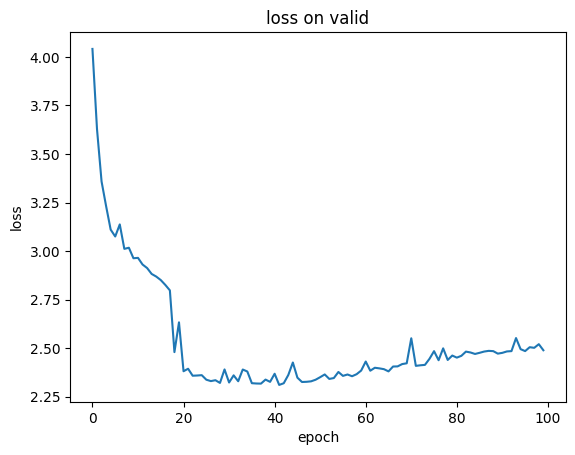

In [ ]:
# x = range(num_epochs)
# y = losses['val']

# plt.plot(x, y)
# plt.ylabel("loss")
# plt.xlabel("epoch")
# plt.title("loss on valid")
# plt.show()

In [ ]:
# torch.save(model, "model_scaling.pth")

## Results

In [33]:
# model = torch.load('model_scaling.pth')
# model.to(device)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.093241856..1.0902951].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.07411989..1.0357442].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1290937..1.2069606].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.090932816..0.9924499].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13440263..1.2336687].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.034254815..0.9648304].


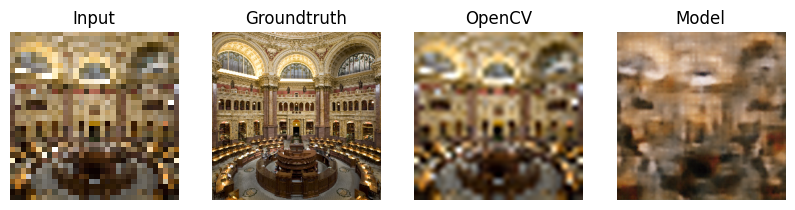

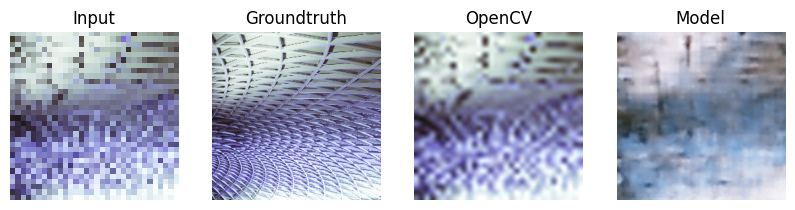

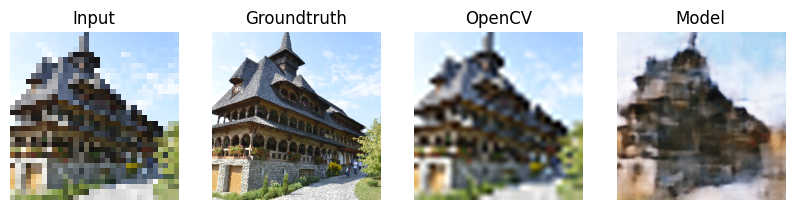

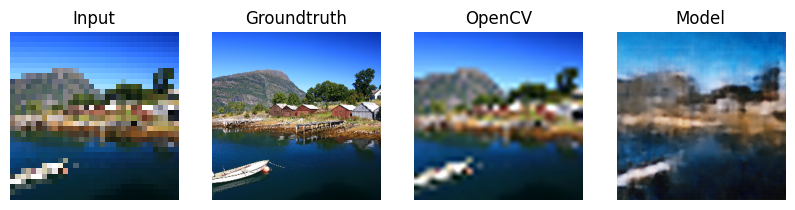

In [ ]:
for i in range(4):
    a = random.choice(valid_dataset)

    model.eval()

    input = a[0].permute(1, 2, 0).detach().numpy()

    out = model(a[0].to(device))
    out = out.permute(1, 2, 0).detach().cpu().numpy()

    dest = a[1].permute(1, 2, 0).detach().numpy()

    fig, axes = plt.subplots(1, 4, figsize=(10, 5)) 

    axes[0].imshow(fix_colors(input))
    axes[0].axis('off')
    axes[0].set_title("Input")

    axes[1].imshow(fix_colors(dest))
    axes[1].axis('off')
    axes[1].set_title("Groundtruth")

    axes[2].imshow(fix_colors(classic_upscale(input)))
    axes[2].axis('off')
    axes[2].set_title("OpenCV")

    axes[3].imshow(fix_colors(out))
    axes[3].axis('off')
    axes[3].set_title("Model")

### Metrics

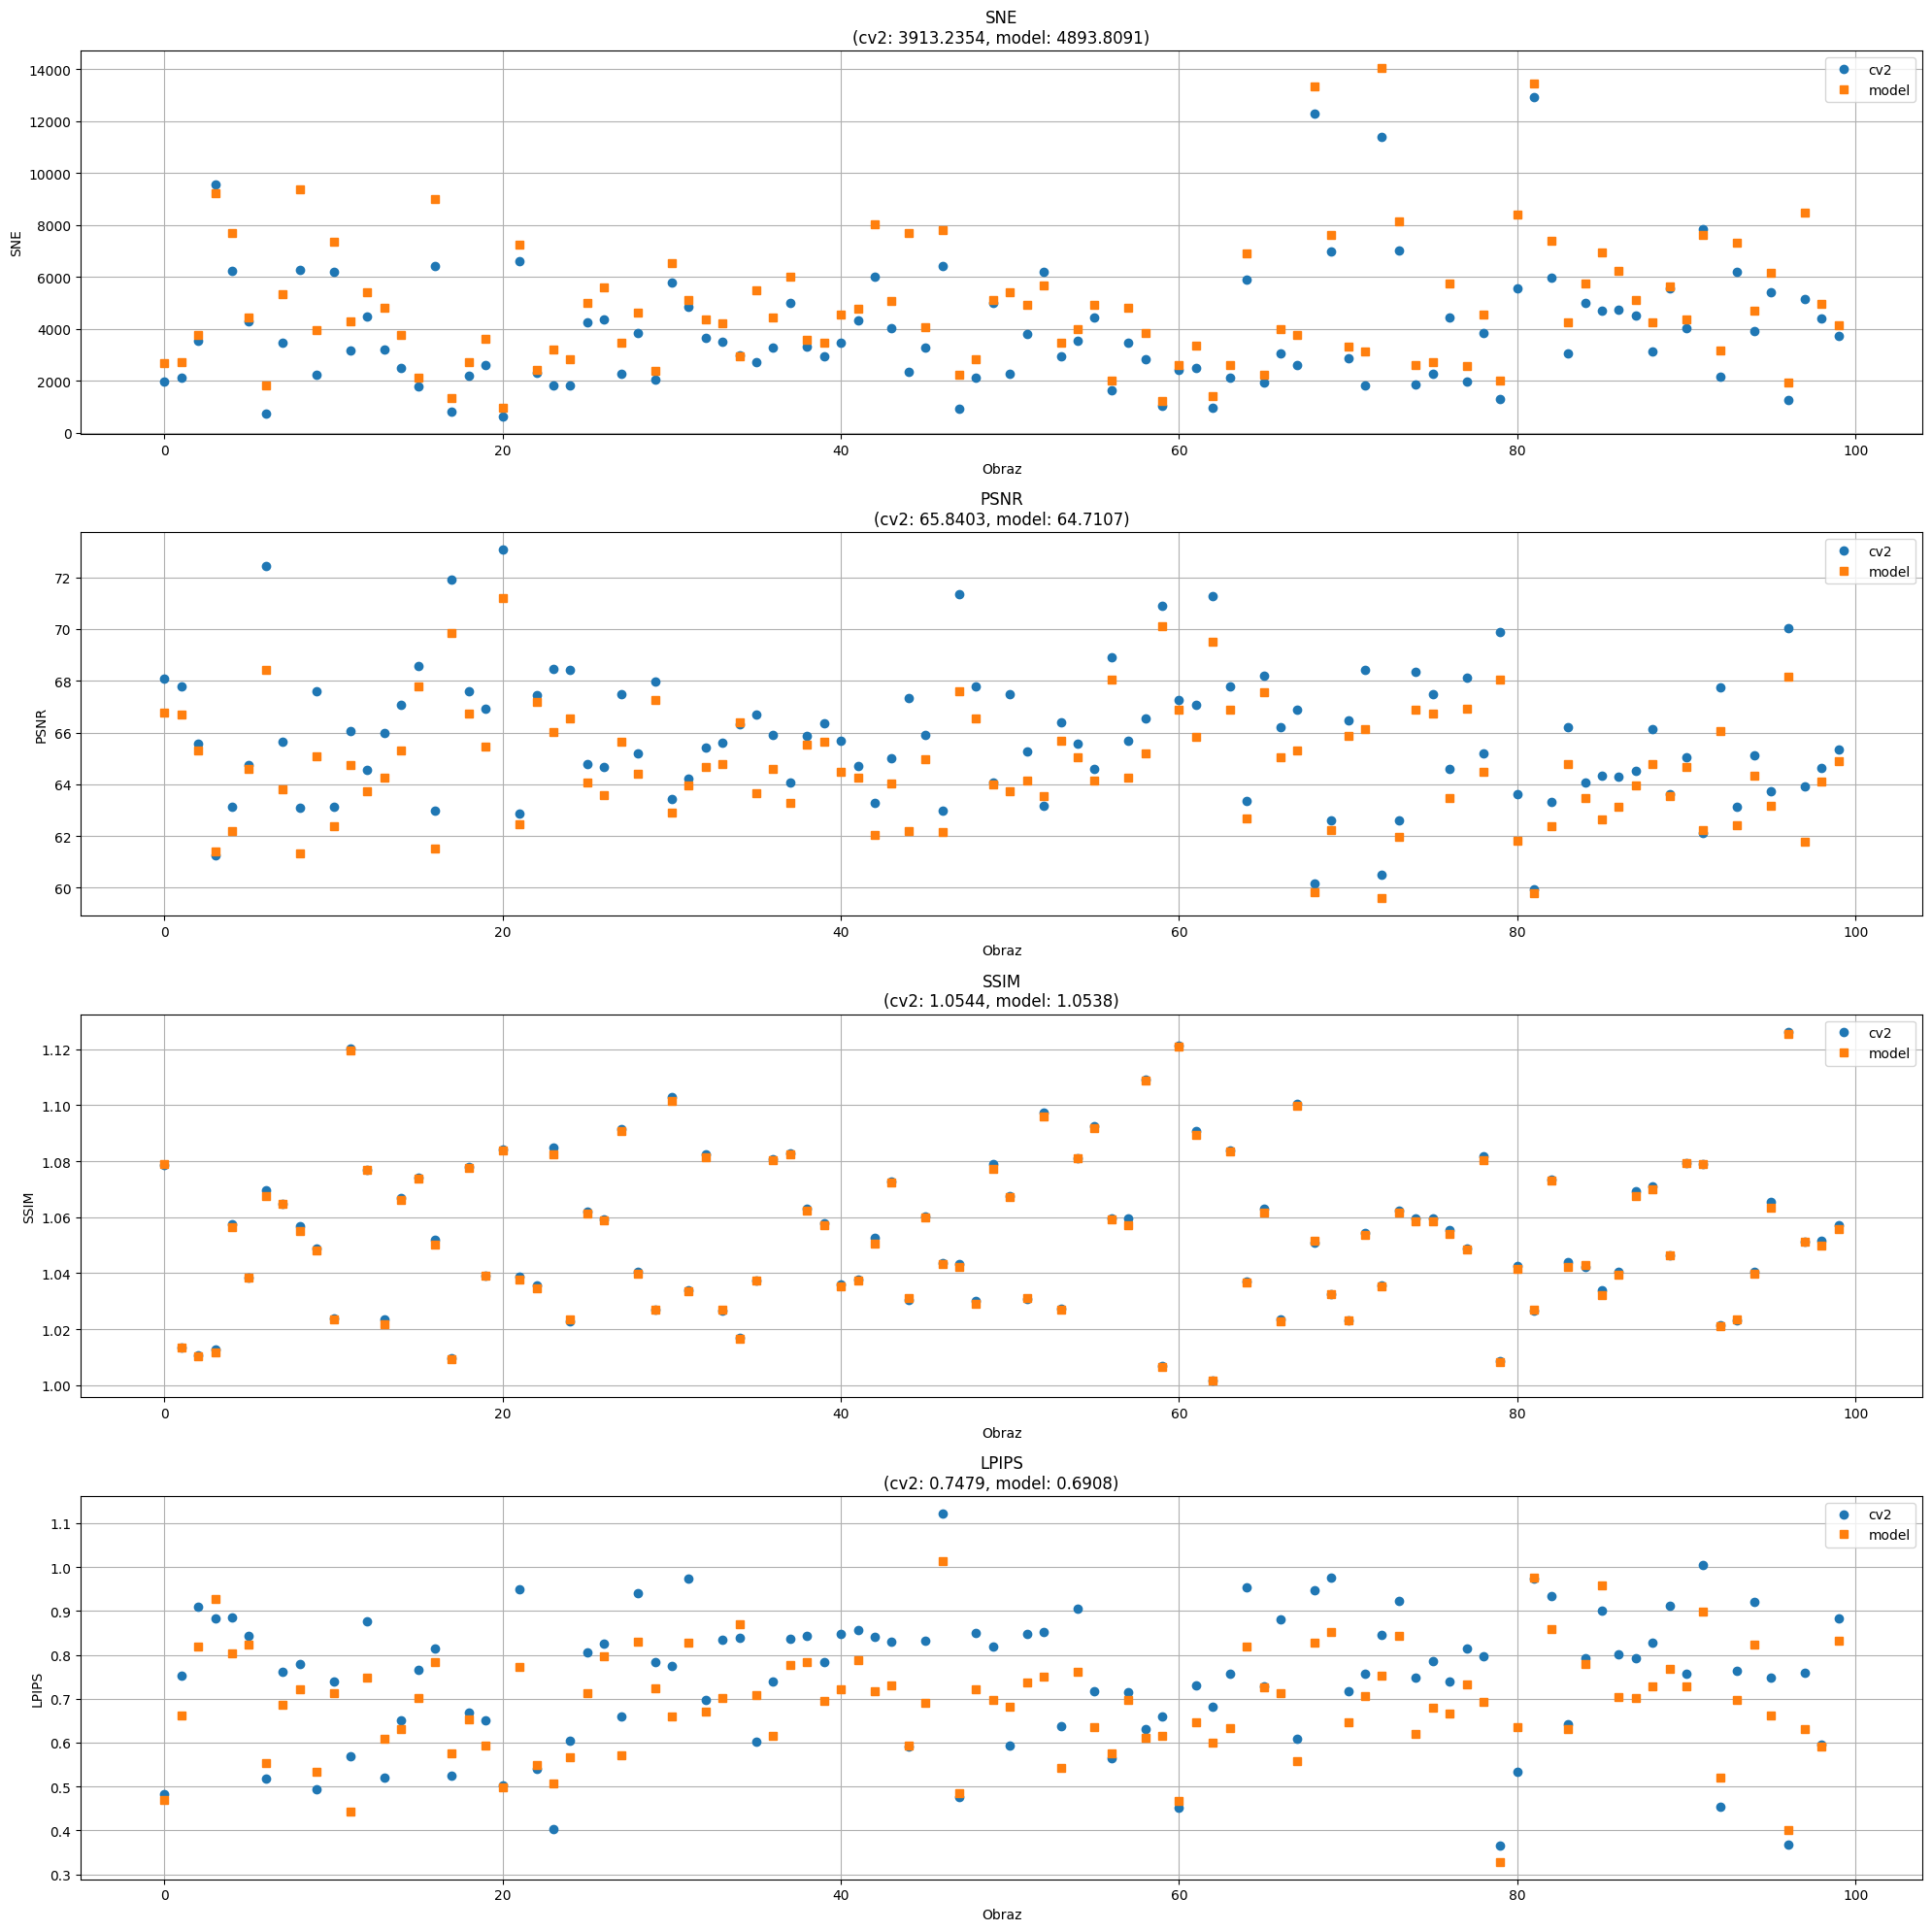

In [ ]:
ground_truth_list = []
cv2_list = []
model_list = []

model.eval()

for x, y in valid_dataset:
    ground_truth_list.append(y.permute(1, 2, 0).detach().numpy())

    cv2_list.append(classic_upscale(x.permute(1, 2, 0).detach().numpy()))

    model_list.append(model(x.to(device)).permute(1, 2, 0).detach().cpu().numpy())


plot_metrics(ground_truth_list, cv2_list, model_list)